In [6]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Load the data
df = pd.read_csv('loan_prediction.csv')

# 2. Handle Missing Values (Crucial for this specific file!)
# For numbers, use the median. For text, use the most common word.
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# 3. Convert Words to Numbers (Encoding)
le = LabelEncoder()
# These match the exact column names in your CSV
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 4. Define X and y
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# 5. SMOTE: Balance the 'Y' and 'N' loan statuses
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 6. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Final Results
print("Success! Model is trained.")
print(classification_report(y_test, model.predict(X_test)))

Success! Model is trained.
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        94
           1       0.74      0.87      0.80        75

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.82      0.80      0.81       169



--- LOGISTIC REGRESSION ---
              precision    recall  f1-score   support

           0       0.90      0.48      0.62        94
           1       0.59      0.93      0.72        75

    accuracy                           0.68       169
   macro avg       0.74      0.71      0.67       169
weighted avg       0.76      0.68      0.67       169

ROC-AUC: 0.71

--- RANDOM FOREST ---
              precision    recall  f1-score   support

           0       0.86      0.72      0.79        94
           1       0.71      0.85      0.78        75

    accuracy                           0.78       169
   macro avg       0.79      0.79      0.78       169
weighted avg       0.79      0.78      0.78       169

ROC-AUC: 0.86


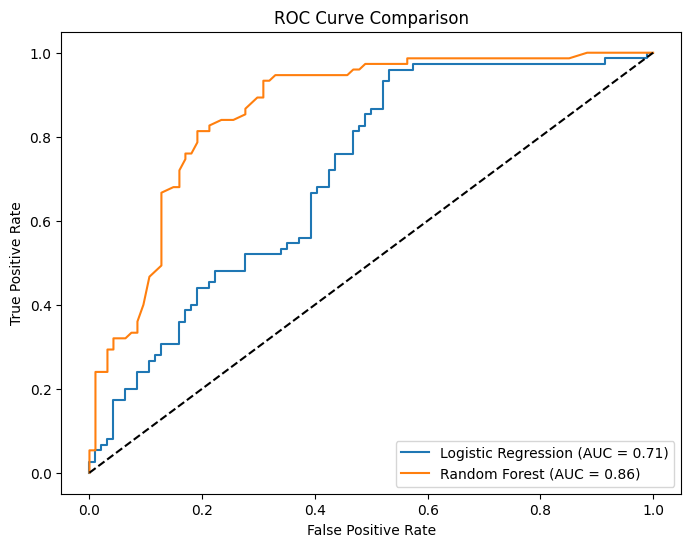

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# 1. Load and Preprocess (Missing Values)
df = pd.read_csv('loan_prediction.csv')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df.fillna(df.mode().iloc[0], inplace=True) # Fill remaining text columns

# 2. Encoding categorical variables
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 3. Define X and y
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# 4. Scaling (Requirement: "Scaling")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Handle Imbalance (Requirement: "SMOTE")
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 7. Compare Models (Requirement: "Logistic vs Tree-based")
# A. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)[:, 1]

# B. Random Forest (Tree-based)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]

# 8. Evaluation Metrics (Requirement: "Precision, Recall, F1, ROC-AUC")
print("--- LOGISTIC REGRESSION ---")
print(classification_report(y_test, lr.predict(X_test)))
print(f"ROC-AUC: {roc_auc_score(y_test, lr_probs):.2f}")

print("\n--- RANDOM FOREST ---")
print(classification_report(y_test, rf.predict(X_test)))
print(f"ROC-AUC: {roc_auc_score(y_test, rf_probs):.2f}")

# 9. Plot ROC Curve
plt.figure(figsize=(8,6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_probs):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()